<h1 style='text-align:center'> Exploring and Modelling Land Based Environmental Threats</h1>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [8]:
# Get data from csv file
land_data_path = '../Enviro Lynx Data/GroundData.csv'
df = pd.read_csv(land_data_path)

In [22]:
# Reused year variables
years = np.array(df['Year'])
ryears = years.reshape(-1,1)

In [9]:
df.head()

,Year,Population Density,World Agriculture Area(%),Forest Area(sq . Km),Urban Population(people)
0,1961,24.129479,33.782312,43390049.5,1018574179
1,1962,24.545523,33.678123,43317382.1,1048126247
2,1963,25.056836,33.542343,43244714.7,1079996583
3,1964,25.571241,33.032422,43172047.3,1114825030
4,1965,26.096704,32.624509,43099379.9,1150484868


In [59]:
df.tail(7)

,Year,Population Density,World Agriculture Area(%),Forest Area(sq . Km),Urban Population(people)
52,2013,56.300331,30.794674,40057482.0,3722958628
53,2014,56.965180,30.769568,40024403.3,3799327693
54,2015,57.630832,30.744264,39991324.6,3876973173
55,2016,58.296128,30.716421,39958245.9,3955764308
56,2017,58.961853,29.988889,39925167.2,4035616270
57,2018,59.617881,27.666667,39892088.5,4115696800
58,2019,59.917881,25.444234,40859009.8,4195079805


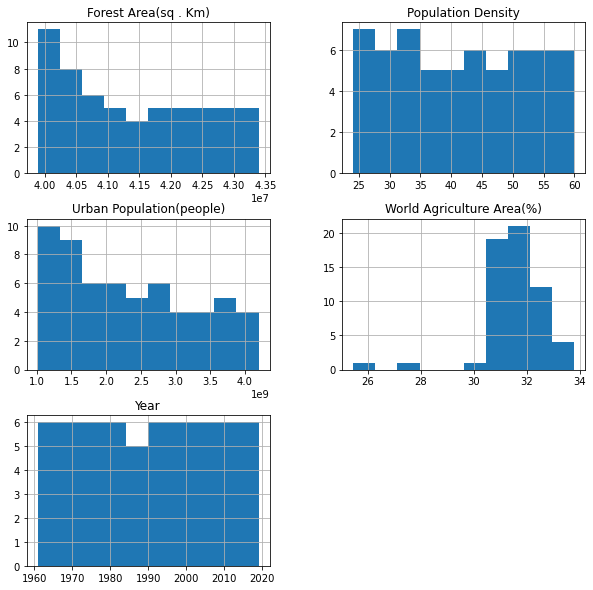

In [12]:
fig = df.hist(figsize=(10,10))

array([-62263.5206955])

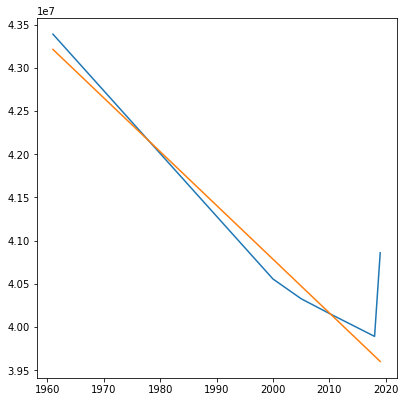

In [36]:
# Forest area
forest_area = np.array(df['Forest Area(sq . Km)'])
fig = plt.figure(figsize=(1,1))
ax = fig.add_axes([1,1,5,5])
plot = ax.plot(years, forest_area)

# Model
reg = linear_model.LinearRegression()
reg.fit(ryears, forest_area)

# Plotting model
ax.plot(years, reg.predict(ryears))
reg.coef_

/Users/derekhuynh/miniconda3/envs/sethacks/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.13686e-19): result may not be accurate.
  overwrite_a=True).T


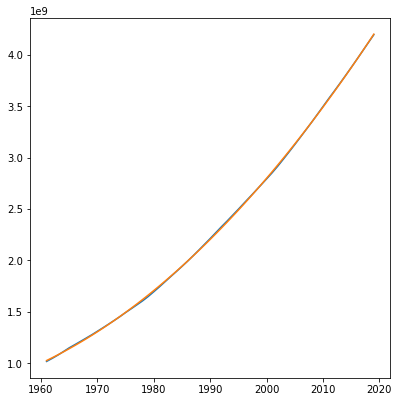

In [48]:
# Urban Population, quadratic growth
upopdf = df['Urban Population(people)']
urban_population = np.array(upopdf)
fig = plt.figure(figsize=(1,1))
ax = fig.add_axes([1,1,5,5])
plot = ax.plot(years, urban_population)

# Polynomial model
model = make_pipeline(PolynomialFeatures(3), linear_model.Ridge())
model.fit(ryears, urban_population)
plot = ax.plot(years, model.predict(ryears))

/Users/derekhuynh/miniconda3/envs/sethacks/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.13686e-19): result may not be accurate.
  overwrite_a=True).T


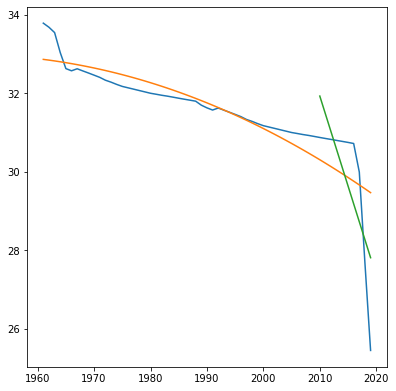

In [66]:
# World Agriculture Area
agri_df = df['World Agriculture Area(%)']
agriculture = np.array(agri_df)
fig = plt.figure(figsize=(1,1))
ax = fig.add_axes([1,1,5,5])
plot = ax.plot(years, agriculture)

# Polynomial model
model = make_pipeline(PolynomialFeatures(3), linear_model.Ridge())
model.fit(ryears, agriculture)
plot = ax.plot(years, model.predict(ryears))

# Linear model, restricting to most recent results
# Very large drop starting in 2018
restricted_agri = agriculture[-10:]
reg = linear_model.LinearRegression()
reg.fit(ryears[-10:], restricted_agri)
plot = ax.plot(years[-10:], reg.predict(ryears[-10:]))